C:\Users\USER\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
100%|███████████████████████████████████████████████████████████████████████| 63661/63661 [00:00<00:00, 2390795.34it/s]


63561
['코로나', '확산', '오늘', '주년', '삼일절', '기념', '식이', '최소', '인원', '기념', '총리', '제외', '요인', '행정안전부', '보건복지부', '장관', '제외', '국무위원', '정당', '대표', '광복회', '참석', '행정안전부', '코로나', '사태', '참석', '인원', '최소', '참석자', '발열', '검사', '증상', '문진', '행사', '시작', '전후', '방역', '소독', '시행', '설명', '기념', '이상', '참석', '대규모', '행사', '주년', '었던', '지난해', '참석', '임명', '저작권', '복제', '재배', '금지']
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30


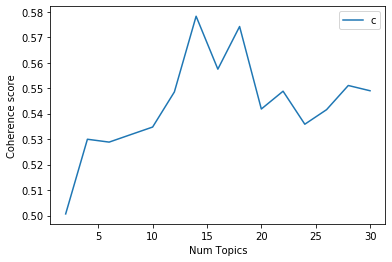

Num Topics = 2  has Coherence Value of 0.5006
Num Topics = 4  has Coherence Value of 0.5299
Num Topics = 6  has Coherence Value of 0.5288
Num Topics = 8  has Coherence Value of 0.5318
Num Topics = 10  has Coherence Value of 0.5347
Num Topics = 12  has Coherence Value of 0.5485
Num Topics = 14  has Coherence Value of 0.5782
Num Topics = 16  has Coherence Value of 0.5575
Num Topics = 18  has Coherence Value of 0.5742
Num Topics = 20  has Coherence Value of 0.5418
Num Topics = 22  has Coherence Value of 0.5488
Num Topics = 24  has Coherence Value of 0.5358
Num Topics = 26  has Coherence Value of 0.5415
Num Topics = 28  has Coherence Value of 0.551
Num Topics = 30  has Coherence Value of 0.549
[(0,
  '0.055*"경찰" + 0.035*"디지털" + 0.032*"위반" + 0.026*"영상" + 0.026*"고발" + '
  '0.022*"카카오" + 0.020*"제보" + 0.020*"혐의" + 0.017*"수사" + 0.017*"제작" + '
  '0.016*"행위" + 0.016*"조사" + 0.015*"신고" + 0.015*"콘텐츠" + 0.014*"경찰청"'),
 (1,
  '0.032*"지역" + 0.032*"코로나" + 0.015*"사회" + 0.014*"지원" + 0.013*"진행" + '
  '0.01

In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen #url의 html 을 가져 오기 위한 패키지
from bs4 import BeautifulSoup  #크롤링 필수 패키지 설치하려면 cmd창에서 pip install bs4
import os
import re
from selenium import webdriver
from bs4 import BeautifulSoup #크롤링 도구
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import os
import re
import time
import json
import datetime
from konlpy.tag import Okt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
import sklearn as skl
import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from ckonlpy.tag import Twitter
import string
import glob
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import warnings




twi = Twitter()
okt = Okt()
twi.nouns('확진자와 비대면으로 거리두기를 사랑제일교회에서부터 전광훈이 사전조사 의료기관과 의료진이 집단감염이 걸려 집단감염, 재택근무하고 '
          '유연근무와 유연근무제를 하고 지역경제와 한국판뉴딜과 그린뉴딜과 디지털뉴딜을 휴면뉴딜하고 취약계층의 긴급재난지원금을 특수고용직에게'
          '고용보험을 진료거부하며 택배기사는 온라인수업으로 선별진료소로 간다') #확인용
okt.nouns('확진자와 비대면으로 거리두기를 사랑제일교회에서부터 전광훈이 사전조사 의료기관과 의료진이 집단감염이 걸려 집단감염, 재택근무하고 '
          '유연근무와 유연근무제를 하고 지역경제와 한국판뉴딜과 그린뉴딜과 디지털뉴딜을 휴면뉴딜하고 취약계층의 긴급재난지원금을 특수고용직에게'
          '고용보험을 진료거부하며 택배기사는 온라인수업으로 선별진료소로 간다') #확인용
#단어 추가 하기      '서구 문학'일 경우는 서구 와 문학으로 나뉨 띄어쓰기가 안됨
twi.add_dictionary('비대면','Noun')
twi.add_dictionary('확진자','Noun')
twi.add_dictionary('거리두기','Noun')
twi.add_dictionary('사랑제일교회','Noun')
twi.add_dictionary('의료기관','Noun')
twi.add_dictionary('의료진','Noun')
twi.add_dictionary('집단감염','Noun')
twi.add_dictionary('유연근무','Noun')
twi.add_dictionary('한국판뉴딜','Noun')
twi.add_dictionary('그린뉴딜','Noun')
twi.add_dictionary('디지털뉴딜','Noun')
twi.add_dictionary('휴면뉴딜','Noun')
twi.add_dictionary('취약계층','Noun')
twi.add_dictionary('긴급재난지원금','Noun')
twi.add_dictionary('고용보험','Noun')
twi.add_dictionary('진료거부','Noun')
twi.add_dictionary('택배기사','Noun')
twi.add_dictionary('선별진료소','Noun')
twi.add_dictionary('고용보험','Noun')
twi.add_dictionary('특수고용직','Noun')


data = pd.read_excel('C:/Users/USER/Desktop/1~8newsurl/covid_url38_word50.xlsx', index_col=0)

list_text = data['text']
words = [twi.nouns(i) for i in tqdm(list(list_text))] #시간 걸림

Prohibit_words = ['기자','연합뉴스','뉴시스','시사저널','신문','뉴스','사진','헤럴드경제','노컷뉴스','파이낸셜뉴스','특파원',
                  '라며','대해','지난','위해','오전','오후','무단','배포','이데일리','머니투데이','앵커','지금','때문','이번',
                  '통해','정도','경우','관련','이미지','출처','일보','면서']

j = 0
for i in tqdm(words):
    for k in Prohibit_words:
        while k in i:
            i.remove(k)
    words[j] = i
    j += 1 #불용어 제외

for k in range(len(words)):
    words[k] = [i for i in words[k] if len(i) > 1]  # 한글자 제외

data['words'] = words

data['length_word'] = [len(i) for i in tqdm(data['words'])]

data50 = data[data['length_word'] >= 50]  #단어 갯수 50개 이하 제거

embedding_model = Word2Vec(list(data50['words']), size=100, window = 6, min_count=150, workers=4, iter=100)
embedding_model.wv.save_word2vec_format('C:/Users/USER/Desktop/백업/covid_model38_2')# 모델 저장
data50.to_excel('C:/Users/USER/Desktop/1~8newsurl/covid_url38_word50_2.xlsx',header=True)
news = data50['words'].tolist()
#news = [str(sent).split(',') for sent in news]
print(len(news))
print(str(news[0]))
#사전 만들기
id2word = corpora.Dictionary(news)

texts = news

corpus = [id2word.doc2bow(text) for text in texts]

#토픽모델링 함수
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      print(num_topics)
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=31, step=2)

# Show graph
limit=31; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


# Print the coherence scores
for m, cv in zip(x, coherence_values):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


# Select the model and print the topics
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

In [5]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.058065 -0.208990       1        1  11.720842
5      0.086863 -0.020380       2        1  11.135957
4      0.052923  0.231843       3        1  11.119433
10     0.252887 -0.019502       4        1   9.887154
11     0.008745 -0.002051       5        1   8.785205
1     -0.080933  0.139644       6        1   8.184676
13    -0.088332  0.012301       7        1   7.805337
2      0.222552 -0.104103       8        1   7.355551
12     0.155995 -0.015817       9        1   6.428752
3     -0.004926  0.173128      10        1   4.730719
8     -0.201437 -0.225123      11        1   4.018323
9      0.037737 -0.116548      12        1   3.777065
6     -0.114860  0.143376      13        1   3.316998
0     -0.269149  0.012222      14        1   1.733995, topic_info=     Term          Freq         Total Category  logprob  loglift
439   확진자  97336.000000  97336.000000  Default  30.0000  30.0000
101    정부  53150.000000  53150.000000  Default  29.0000  29.0000
9      방역  56527.000000  56527.000000  Default  28.0000  28.0000
1029   확진  38116.000000  38116.000000  Default  27.0000  27.0000
0      검사  37427.000000  37427.000000  Default  26.0000  26.0000
...   ...           ...           ...      ...      ...      ...
307    예방   2965.785156   9624.556641  Topic14  -4.3156   2.8776
361    조사   3505.153564  27670.488281  Topic14  -4.1485   1.9886
3      금지   2845.703857  61999.261719  Topic14  -4.3570   0.9734
26     재배   2513.345947  34792.558594  Topic14  -4.4812   1.4270
312   온라인   2244.667725  32276.195312  Topic14  -4.5942   1.3890

[827 rows x 6 columns], token_table=      Topic      Freq Term
term                      
4173     14  0.999320   가게
442       1  0.013490   가격
442       4  0.167373   가격
442       8  0.451656   가격
442       9  0.061168   가격
...     ...       ...  ...
783       8  0.098660   효과
783       9  0.189895   효과
783      10  0.036832   효과
2636      7  0.974073   휴가
2636      9  0.025107   휴가

[1760 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 5, 11, 12, 2, 14, 3, 13, 4, 9, 10, 7, 1])

In [9]:
# Select the model and print the topics
optimal_model = model_list[6]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=20))


[(0,
  '0.055*"경찰" + 0.035*"디지털" + 0.032*"위반" + 0.026*"영상" + 0.026*"고발" + '
  '0.022*"카카오" + 0.020*"제보" + 0.020*"혐의" + 0.017*"수사" + 0.017*"제작" + '
  '0.016*"행위" + 0.016*"조사" + 0.015*"신고" + 0.015*"콘텐츠" + 0.014*"경찰청" + '
  '0.014*"채널" + 0.013*"예방" + 0.013*"법률" + 0.013*"금지" + 0.012*"전화"'),
 (1,
  '0.032*"지역" + 0.032*"코로나" + 0.015*"사회" + 0.014*"지원" + 0.013*"진행" + '
  '0.013*"참여" + 0.013*"제공" + 0.012*"경제" + 0.010*"예정" + 0.010*"행사" + 0.009*"문화" '
  '+ 0.009*"피해" + 0.009*"센터" + 0.009*"주민" + 0.008*"금지" + 0.008*"활동" + '
  '0.008*"시민" + 0.008*"개최" + 0.007*"공동" + 0.007*"사랑"'),
 (2,
  '0.020*"상승" + 0.019*"코로나" + 0.016*"주가" + 0.014*"미국" + 0.014*"거래" + '
  '0.014*"투자" + 0.013*"경제" + 0.013*"달러" + 0.013*"하락" + 0.013*"포인트" + '
  '0.011*"증권" + 0.011*"시장" + 0.011*"지수" + 0.010*"내년" + 0.010*"주식" + 0.009*"이후" '
  '+ 0.009*"전망" + 0.009*"증시" + 0.008*"확산" + 0.008*"금리"'),
 (3,
  '0.029*"온라인" + 0.029*"고객" + 0.025*"상품" + 0.024*"서비스" + 0.020*"판매" + '
  '0.017*"제품" + 0.017*"매장" + 0.014*"배송" + 0.014*"까지" + 0.014*"식품

In [10]:
model_list2, coherence_values2 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=10, limit=16, step=1)


10
11
12
13
14
15


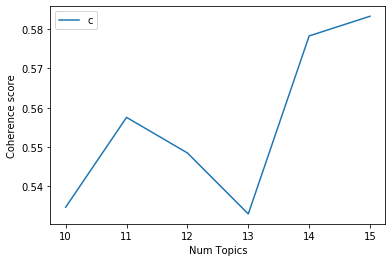

[(0,
  '0.059*"경찰" + 0.041*"위반" + 0.041*"고발" + 0.040*"아파트" + 0.024*"단지" + '
  '0.022*"제보" + 0.022*"조사" + 0.021*"혐의" + 0.021*"행위" + 0.019*"서울" + 0.018*"수사" '
  '+ 0.017*"청구" + 0.017*"신고" + 0.016*"전용" + 0.015*"경찰청"'),
 (1,
  '0.034*"코로나" + 0.030*"지역" + 0.023*"지원" + 0.015*"경제" + 0.014*"진행" + '
  '0.014*"제공" + 0.014*"사회" + 0.013*"참여" + 0.012*"센터" + 0.011*"행사" + 0.010*"문화" '
  '+ 0.009*"예정" + 0.009*"금지" + 0.008*"프로그램" + 0.008*"활동"'),
 (2,
  '0.060*"확진자" + 0.046*"환자" + 0.028*"발생" + 0.028*"병원" + 0.027*"치료" + '
  '0.027*"신규" + 0.026*"코로나" + 0.023*"감염" + 0.018*"대구" + 0.017*"지역" + '
  '0.015*"병상" + 0.015*"누적" + 0.013*"기준" + 0.013*"서울" + 0.013*"본부"'),
 (3,
  '0.035*"판매" + 0.032*"상품" + 0.026*"고객" + 0.025*"매장" + 0.023*"매출" + 0.021*"배송" '
  '+ 0.021*"식품" + 0.021*"제품" + 0.019*"구매" + 0.018*"온라인" + 0.017*"건강" + '
  '0.017*"소비자" + 0.015*"할인" + 0.014*"사용" + 0.014*"까지"'),
 (4,
  '0.050*"기업" + 0.034*"투자" + 0.032*"금융" + 0.023*"주가" + 0.021*"은행" + 0.014*"주식" '
  '+ 0.014*"일자리" + 0.011*"시장" + 0.011*"증권" + 0.01

In [13]:
# Show graph
limit=16; start=10; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Select the model and print the topics
optimal_model = model_list2[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

In [1]:
import pandas as pd
import numpy as np
from urllib.request import urlopen #url의 html 을 가져 오기 위한 패키지
from bs4 import BeautifulSoup  #크롤링 필수 패키지 설치하려면 cmd창에서 pip install bs4
import os
import re
from selenium import webdriver
from bs4 import BeautifulSoup #크롤링 도구
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import os
import re
import time
import json
import datetime
from konlpy.tag import Okt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
import sklearn as skl
import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from ckonlpy.tag import Twitter
import string
import glob
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import warnings
data = pd.read_excel('C:/Users/USER/Desktop/1~8newsurl/covid_url38_word50_2.xlsx', index_col=0)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/USER/Desktop/1~8newsurl/covid_url38_word50_2.xlsx'

100%|███████████████████████████████████████████████████████████████████████| 63561/63561 [00:00<00:00, 3034651.75it/s]


63547
['코로나', '확산', '오늘', '주년', '삼일절', '기념', '식이', '최소', '인원', '기념', '총리', '제외', '요인', '행정안전부', '보건복지부', '장관', '제외', '국무위원', '정당', '대표', '광복회', '참석', '행정안전부', '코로나', '사태', '참석', '인원', '최소', '참석자', '발열', '검사', '증상', '문진', '행사', '시작', '전후', '방역', '소독', '시행', '설명', '기념', '이상', '참석', '대규모', '행사', '주년', '었던', '지난해', '참석', '임명', '저작권', '복제', '재배', '금지']
10
11
12
13
14
15
16


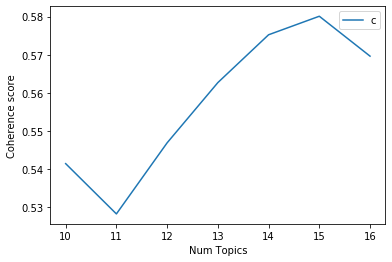

In [6]:

aa = data['words']
words = [i.replace("'","").replace('[','').replace(']','').replace(' ','').split(',') for i in aa]



Prohibit_words = ['기자','연합뉴스','뉴시스','시사저널','신문','뉴스','사진','헤럴드경제','노컷뉴스','파이낸셜뉴스','특파원',
                  '라며','대해','지난','위해','오전','오후','무단','배포','이데일리','머니투데이','앵커','지금','때문','이번',
                  '통해','정도','경우','관련','이미지','출처','일보','면서','까지','이나','우리']

j = 0
for i in tqdm(words):
    for k in Prohibit_words:
        while k in i:
            i.remove(k)
    words[j] = i
    j += 1 #불용어 제외

for k in range(len(words)):
    words[k] = [i for i in words[k] if len(i) > 1]  # 한글자 제외

data['words'] = words

data['length_word'] = [len(i) for i in tqdm(data['words'])]

data50 = data[data['length_word'] >= 50]  #단어 갯수 50개 이하 제거

news = data50['words'].tolist()
#news = [str(sent).split(',') for sent in news]
print(len(news))
print(str(news[0]))
#사전 만들기
id2word = corpora.Dictionary(news)

texts = news

corpus = [id2word.doc2bow(text) for text in texts]

#토픽모델링 함수
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      print(num_topics)
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


model_list3, coherence_values3 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=10, limit=17, step=1)

# Show graph
limit=17; start=10; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Select the model and print the topics
optimal_model = model_list3[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))